In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [16]:
df = pd.read_csv('life_expectancy.csv')
print(df.shape)
df = df.dropna()
print(df.shape)
df.head(20)

(2938, 22)
(1649, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='count'>

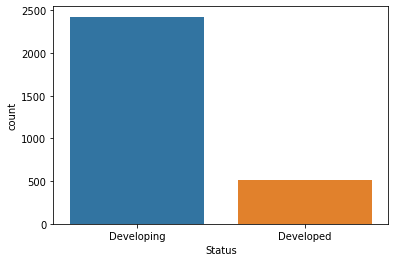

In [4]:
sns.countplot(df['Status'])

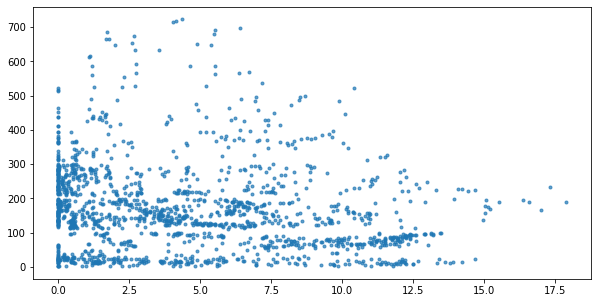

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['Alcohol'], df['Adult Mortality'], s=9, alpha=.7)
plt.show()

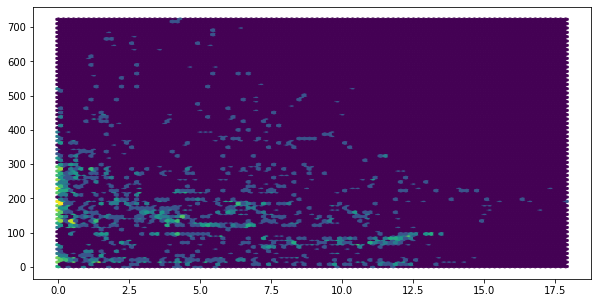

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hexbin(df['Alcohol'], df['Adult Mortality'], bins='log')
plt.show()

In [17]:
pearsonr(df['Alcohol'], df['Adult Mortality'])

(-0.17553508575848253, 7.047634828136608e-13)

In [20]:
pearsonr(df['Alcohol'], df['GDP'])

(0.4434327894751659, 2.200189935367425e-80)

In [21]:
pearsonr(df['GDP'], df['Adult Mortality'])

(-0.2550347325077519, 6.764627126558168e-26)

In [26]:
le_by_year = df.groupby(['Year', 'Status']).agg(mean_life_expectancy=('Life expectancy ', 'mean')).reset_index(drop=False)

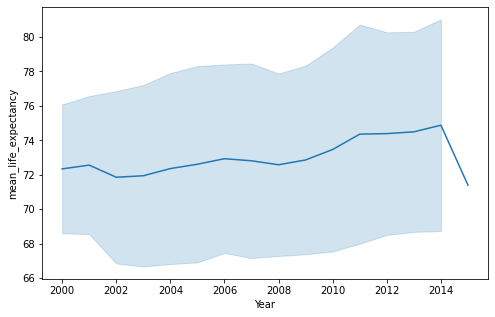

In [28]:
plt.subplots(figsize=(8, 5))
sns.lineplot(data=le_by_year, x='Year', y='mean_life_expectancy')
plt.show()

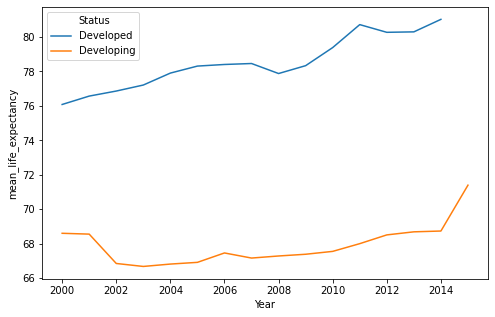

In [29]:
plt.subplots(figsize=(8, 5))
sns.lineplot(data=le_by_year, x='Year', y='mean_life_expectancy', hue='Status')
plt.show()

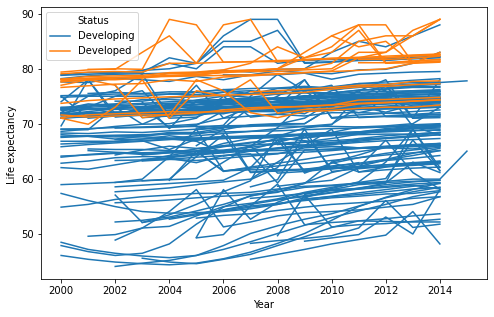

In [33]:
plt.subplots(figsize=(8, 5))
sns.lineplot(data=df.sort_values('Year'), x='Year', y='Life expectancy ',
             hue='Status', units='Country', estimator=None)
plt.show()

In [34]:
developed_df = df[df['Status'] == 'Developed']

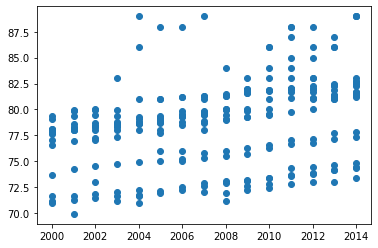

In [35]:
plt.scatter(developed_df['Year'], developed_df['Life expectancy '])

In [36]:
pearsonr(developed_df['Year'], developed_df['Life expectancy '])

(0.3351248239763273, 9.213554147745631e-08)

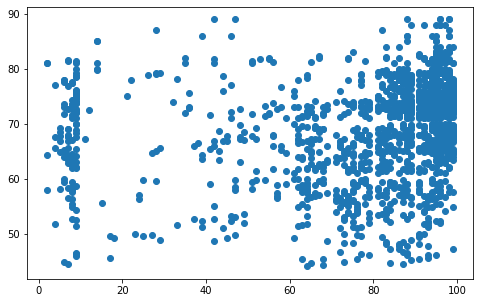

In [37]:
plt.subplots(figsize=(8, 5))
plt.scatter(df['Hepatitis B'], df['Life expectancy '])
plt.show()

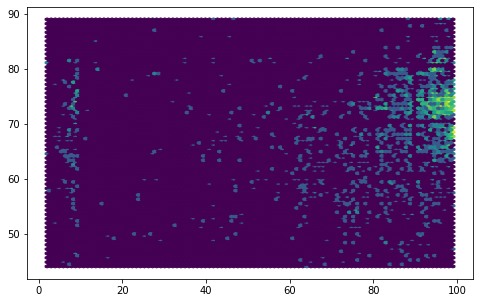

In [38]:
plt.subplots(figsize=(8, 5))
plt.hexbin(df['Hepatitis B'], df['Life expectancy '], bins='log')
plt.show()

In [39]:
pearsonr(df['Hepatitis B'], df['Life expectancy '])

(0.1999352763975776, 2.4919048705031504e-16)

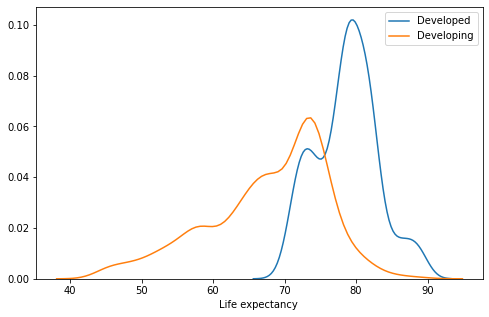

In [40]:
plt.subplots(figsize=(8, 5))
sns.distplot(df[df['Status'] == 'Developed']['Life expectancy '], label='Developed', hist=False)
sns.distplot(df[df['Status'] == 'Developing']['Life expectancy '], label='Developing', hist=False)
plt.legend()
plt.show()

In [42]:
azer_df = df[df['Country'] == 'Azerbaijan']

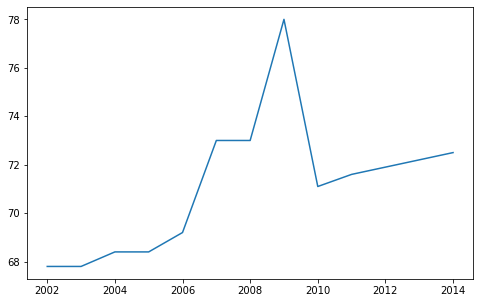

In [43]:
plt.subplots(figsize=(8, 5))
plt.plot(azer_df['Year'], azer_df['Life expectancy '])
plt.show()

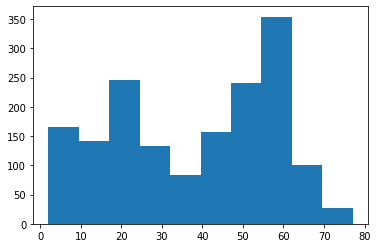

In [45]:
plt.hist(df[' BMI '])
plt.show()